#**Investigate Hotel Business using Data Visualization**


In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis

#Ignores warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Import Dataset
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/PORTOFOLIO/Mini Project 2/hotel_bookings_data.csv'

# Baca data CSV menggunakan pandas
df = pd.read_csv(file_path)

#df = pd.read_csv(source)
df.head()

Mounted at /content/drive


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


**Check the data info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

- Dataset terdiri dari 29 kolom dan 119.390 baris
- Terdapat 3 tipe data yaitu object, int64, dan float64

**Check Data Null**

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

 - Terdapat missing value pada kolom :
     1. **children** dengan null values 4 baris
     2. **city** dengan null values 488 baris
     3. **agent** dengan null values 16.340 baris
     4. **company** denegan null values 112.593 baris

##**Data Preprocessing**



###**1.   Handling Data Duplicated**



In [ ]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values)).head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
78101,City Hotel,0,0,2017,December,40,2,0,2,1,...,2,No Deposit,NaN,NaN,0,Family,145.0,0,0,Check-Out
78104,City Hotel,0,0,2017,December,40,2,0,2,1,...,2,No Deposit,NaN,NaN,0,Family,145.0,0,0,Check-Out
78105,City Hotel,0,0,2017,December,40,2,0,2,1,...,2,No Deposit,NaN,NaN,0,Family,145.0,0,0,Check-Out
78403,City Hotel,0,0,2017,December,41,6,0,3,1,...,0,No Deposit,NaN,NaN,0,Personal,130.0,0,0,Check-Out
78407,City Hotel,0,0,2017,December,41,6,0,3,1,...,0,No Deposit,NaN,NaN,0,Personal,130.0,0,0,Check-Out
78385,City Hotel,0,0,2017,December,41,7,0,2,1,...,0,No Deposit,1.0,NaN,0,Family,119.0,0,0,Check-Out
78401,City Hotel,0,0,2017,December,41,7,0,2,1,...,0,No Deposit,1.0,NaN,0,Family,119.0,0,0,Check-Out
78404,City Hotel,0,0,2017,December,41,7,0,2,1,...,0,No Deposit,1.0,NaN,0,Family,119.0,0,0,Check-Out
78402,City Hotel,0,0,2017,December,41,7,0,2,2,...,0,No Deposit,1.0,NaN,0,Family,138.0,0,0,Check-Out
78405,City Hotel,0,0,2017,December,41,7,0,2,2,...,0,No Deposit,1.0,NaN,0,Family,138.0,0,0,Check-Out


In [ ]:
print('Jumlah Data Duplikat :', df.duplicated().sum())

Jumlah Data Duplikat : 33261


In [ ]:
print(f'Dataset sebelum dilakukan remove duplikat : {df.shape}')
df= df.drop_duplicates().reset_index(drop=True)
print(f'Dataset sesudah dilakukan remove duplikat : {df.shape}')

Dataset sebelum dilakukan remove duplikat : (119390, 29)
Dataset sesudah dilakukan remove duplikat : (86129, 29)


- Jumlah data yang duplikat yaitu 33.261 baris
- Dataset sebelum dilakukan remove duplikat adalah 119.390 baris dan 29 kolom
- Dataset sesudah dilakukan remove duplikat atau handling data duplikat adalah 86.129 baris dan 29 kolom


##**2.   Handling Missing Values**

In [ ]:
# Filling zero value in the company because no company is involved
df['company'] = df['company'].fillna(0)
# Filling zero value in the agent because no agent is involved
df['agent'] = df['agent'].fillna(0)
# Filling zeri value in Children because of the posibilty that the customer really doesn't have children
df['children'] = df['children'].fillna(0)
# Filling 'inknown' for unavailable city
df['city'] = df['city'].fillna('unknown')

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   


##**3. Handling Incorrect Values**

Merubah incorrect values di kolom meal
- Merubah **Undefined** to **No Meal**

In [ ]:
df['meal'] = df['meal'].replace(['Undefined'],'No Meal')

In [ ]:
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal'], dtype=object)

Merubah incorrect type value di kolom **children**, **agent**, dan **company**
- Merubah tipe data float64 pada kolom **children**, **agent**, dan **company**  menjadi int64

In [ ]:
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

In [ ]:
print('Tipe Data After Correction:\n')
df.info()

Tipe Data After Correction:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86129 entries, 0 to 86128
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86129 non-null  object 
 1   is_canceled                     86129 non-null  int64  
 2   lead_time                       86129 non-null  int64  
 3   arrival_date_year               86129 non-null  int64  
 4   arrival_date_month              86129 non-null  object 
 5   arrival_date_week_number        86129 non-null  int64  
 6   arrival_date_day_of_month       86129 non-null  int64  
 7   stays_in_weekend_nights         86129 non-null  int64  
 8   stays_in_weekdays_nights        86129 non-null  int64  
 9   adults                          86129 non-null  int64  
 10  children                        86129 non-null  int64  
 11  babies                          86129 non-null  int64  
 12  mea


##**4. Drop Unnecessary Data**
- Number of Customers/Guests
- Total duration of the night


In [ ]:
print('Before Drop Unnecessary Data')
print('Total Data = {} rows'.format(df.shape[0]))

# Number of Customers (adults + children + babies)
df['total_customers'] = df['adults'] + df['children'] + df['babies']
print('No Customers = {} rows'.format(df[df['total_customers'] == 0].shape[0]))

# Total Duration of The Night (weekend and weekdays)
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
print('No Duration of Stay = {} rows'.format(df[df['stay_duration'] == 0].shape[0]))

print('After Drop Unnecessary Data')

df_final = df[(df['total_customers'] > 0) & (df['stay_duration'] > 0)]

print('Total Data = {} rows'.format(df_final.shape[0]))

Before Drop Unnecessary Data
Total Data = 86129 rows
No Customers = 165 rows
No Duration of Stay = 645 rows
After Drop Unnecessary Data
Total Data = 85378 rows


###**1. Membuat Table Agregat yang Menunjukan Perbandingan Jumlah Pemesanan Hotel Setiap Bulannya berdasarkan Jenis Hotel**
hint : perhatikan berdasarkan jenis hotel

In [ ]:
df_final["arrival_date_num_month"] = pd.to_datetime(df_final['arrival_date_month'], format='%B').dt.month

In [ ]:
dfg = df_final.groupby(['hotel', 'arrival_date_month', 'arrival_date_num_month', 'arrival_date_year']).agg({'hotel': 'count'}).rename(columns={'hotel': 'total_booking'}).reset_index()
dfg.sort_values(by=['hotel', 'arrival_date_num_month', 'arrival_date_year'], inplace=True)
dfg.drop('arrival_date_num_month', axis=1, inplace=True)
dfg.set_index(['hotel', 'arrival_date_month', 'arrival_date_year'])

total_booking
hotel        arrival_date_month arrival_date_year               
City Hotel   January            2017                         753
                                2018                        2096
             February           2017                         988
                                2018                        1964
             March              2018                        1004
                                2019                        1670
             April              2018                        1608
                                2019                        1906
             May                2018                        2340
                                2019                        2437
             June               2018                        2376
                                2019                        2641
             July               2018                        2290
                                2019                        3031
             August             2018                        2215
                                2019                        2693
             September          2017                         370
                                2018                        2447
                                2019                        2840
             October            2017                        1051
                                2018                        2774
                                2019                        2648
             November           2017                        1531
                                2018                        2509
             December           2017                        1439
                                2018                        2570
Resort Hotel January            2017                         831
                                2018                        1164
             February           2017                         923
                                2018                        1121
             March              2018                         798
                                2019                        1106
             April              2018                        1124
                                2019                        1329
             May                2018                        1419
                                2019                        1166
             June               2018                        1313
                                2019                        1443
             July               2018                        1374
                                2019                        1489
             August             2018                        1197
                                2019                        1508
             September          2017                        1258
                                2018                        1349
                                2019                        1656
             October            2017                        1329
                                2018                        1585
                                2019                        1701
             November           2017                        1132
                                2018                        1254
             December           2017                        1090
                                2018                        1528

In [ ]:
df_book = df_final.groupby(['hotel','arrival_date_month','arrival_date_num_month']).agg({'arrival_date_year':['nunique','count']}).reset_index()

df_book.columns = ['hotel_type','arrival_month','arrival_num_month','num_year','total_booking']
df_book

,hotel_type,arrival_month,arrival_num_month,num_year,total_booking
0,City Hotel,April,4,2,3514
1,City Hotel,August,8,2,4908
2,City Hotel,December,12,2,4009
3,City Hotel,February,2,2,2952
4,City Hotel,January,1,2,2849
5,City Hotel,July,7,2,5321
6,City Hotel,June,6,2,5017
7,City Hotel,March,3,2,2674
8,City Hotel,May,5,2,4777
9,City Hotel,November,11,2,4040


### **2. Melakukan Normalisasi Data**

In [ ]:
df_book[df_book['num_year'] != 2]

,hotel_type,arrival_month,arrival_num_month,num_year,total_booking
10,City Hotel,October,10,3,6473
11,City Hotel,September,9,3,5657
22,Resort Hotel,October,10,3,4615
23,Resort Hotel,September,9,3,4263


In [ ]:
df_book['avg_booking'] = round(df_book['total_booking'] / df_book['num_year'])
df_book

,hotel_type,arrival_month,arrival_num_month,num_year,total_booking,avg_booking
0,City Hotel,April,4,2,3514,1757.0
1,City Hotel,August,8,2,4908,2454.0
2,City Hotel,December,12,2,4009,2004.0
3,City Hotel,February,2,2,2952,1476.0
4,City Hotel,January,1,2,2849,1424.0
5,City Hotel,July,7,2,5321,2660.0
6,City Hotel,June,6,2,5017,2508.0
7,City Hotel,March,3,2,2674,1337.0
8,City Hotel,May,5,2,4777,2388.0
9,City Hotel,November,11,2,4040,2020.0


### **3. Urutkan data berdasarkan bulan**

In [ ]:
df_book.sort_values(by=['hotel_type','arrival_num_month'], inplace=True)

sort = ['January','February','March','April','May','June','July','August','September','October','November','December']
df_book['arrival_month'] = pd.Categorical(df_book['arrival_month'], categories = sort, ordered= True)
df_book

,hotel_type,arrival_month,arrival_num_month,num_year,total_booking,avg_booking
4,City Hotel,January,1,2,2849,1424.0
3,City Hotel,February,2,2,2952,1476.0
7,City Hotel,March,3,2,2674,1337.0
0,City Hotel,April,4,2,3514,1757.0
8,City Hotel,May,5,2,4777,2388.0
6,City Hotel,June,6,2,5017,2508.0
5,City Hotel,July,7,2,5321,2660.0
1,City Hotel,August,8,2,4908,2454.0
11,City Hotel,September,9,3,5657,1886.0
10,City Hotel,October,10,3,6473,2158.0


### **4. Membuat plot yang dapat menunjukan perubahan kenaikan maupun penurunan dari jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel**

- x = bulan
- y = average total booking

membuat dua line plot/bar plot pada tiap masing masing tipe hotel

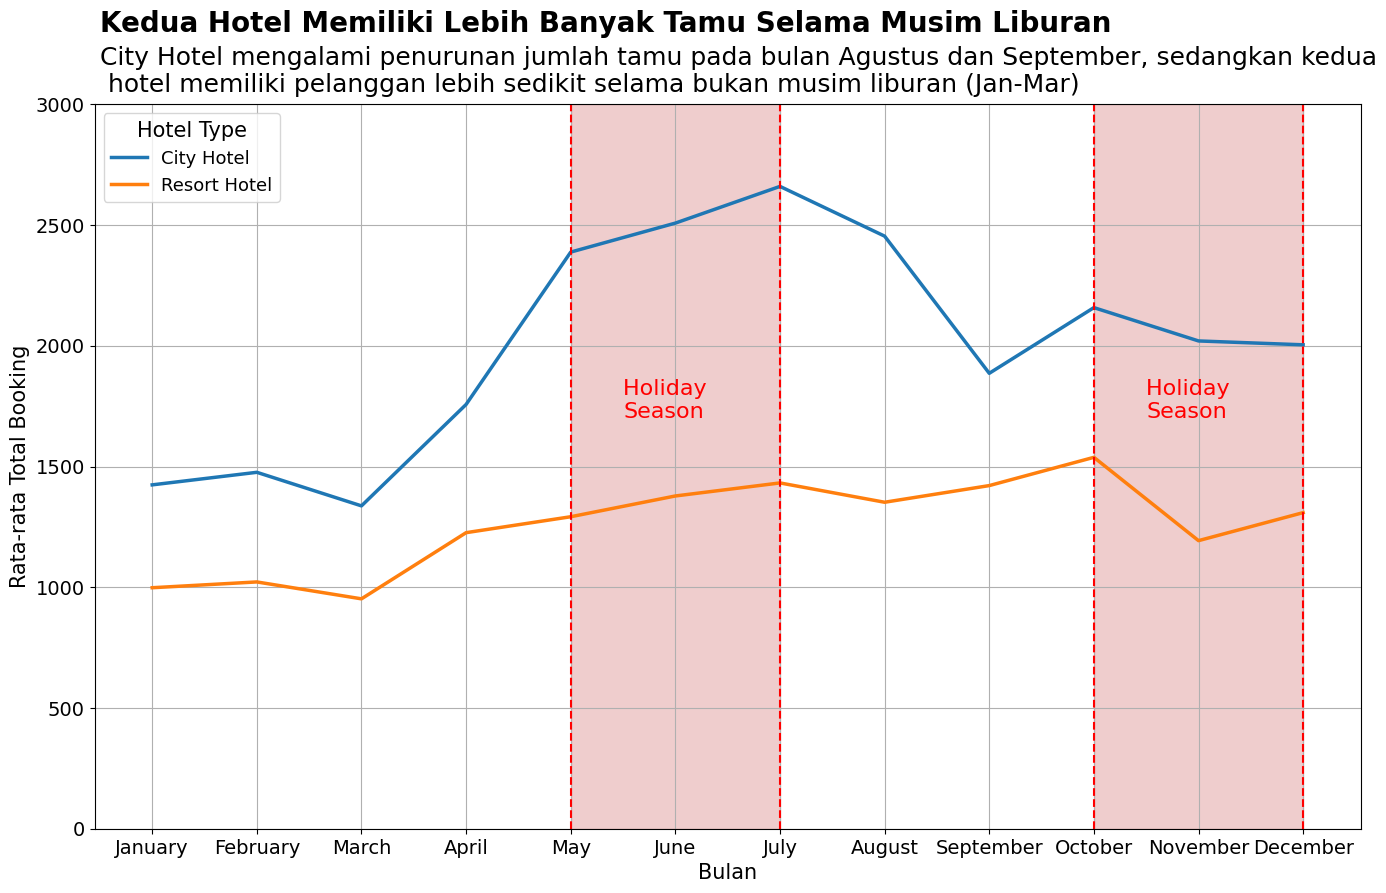

In [ ]:
plt.figure(figsize=(15,9)) # mengatur ukuran figure
sns.lineplot(x='arrival_month', y='avg_booking', hue='hotel_type',
             size="hotel_type", sizes=(2.5, 2.5), data=df_book) # plot awal menggunakan lineplot dari library seaborn

plt.tick_params(axis='both', which='major', labelsize=14) # memperbesar ukuran x-y axis label
plt.grid() # menambahkan gridline
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}) # mengatur judul dan ukuran font pada legenda

plt.xlabel('Bulan', fontsize=15) # mengatur title pada x-axis
plt.ylabel('Rata-rata Total Booking', fontsize=15) # mengatur title pada y-axis
plt.ylim(0, 3000) # membatasi y axis

plt.axvline(4, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.axvline(6, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=4.5, y=1700, s='Holiday \nSeason', fontsize=16, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(4,7,1), [[3000]], color='indianred', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.axvline(9, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.axvline(11, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=9.5, y=1700, s='Holiday \nSeason', fontsize=16, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(9,12,1), [[3000]], color='indianred', alpha=0.3) # memberikan blok warna pada

plt.text(x=-0.5, y=3300, s="Kedua Hotel Memiliki Lebih Banyak Tamu Selama Musim Liburan",
         fontsize=20, fontweight='bold') # memberikan judul yang informatif
plt.text(x=-0.5, y=3050, s="City Hotel mengalami penurunan jumlah tamu pada bulan Agustus dan September, sedangkan kedua\n hotel memiliki pelanggan lebih sedikit selama bukan musim liburan (Jan-Mar)",
         fontsize=18) # memberikan keterangan tambahan atas judul

plt.tight_layout() # mengatur layout dari visualisasi agar tidak terpotong
plt.savefig(r"C:\Users\Sakinah\OneDrive\Gambar\Investigate_Hotel_Business.png", dpi=200)

### **5. Interpretasi**

Grafik menunjukkan dua line plot, masing-masing merepresentasikan perubahan rata-rata total pemesanan hotel setiap bulan untuk dua jenis hotel yang berbeda. Garis pada plot menunjukkan bagaimana jumlah rata-rata pemesanan berubah dari bulan ke bulan dalam tahun yang diamati.

**1. City Hotel:**

- Terlihat dari line plot untuk City Hotel, jumlah rata-rata total pemesanan cenderung mengalami fluktuasi sepanjang tahun.
- Pada bulan April, City Hotel mencatat rata-rata total pemesanan tertinggi, diikuti oleh bulan Juli.
- Bulan-bulan dengan rata-rata total pemesanan terendah adalah Januari dan Maret.
- Secara keseluruhan, City Hotel menunjukkan tren naik turun dalam jumlah pemesanan sepanjang tahun.

**2. Resort Hotel:**

- Line plot untuk Resort Hotel juga menunjukkan fluktuasi dalam jumlah rata-rata total pemesanan sepanjang tahun.
- Pada bulan April, Resort Hotel memiliki rata-rata total pemesanan tertinggi, dan bulan Maret memiliki rata-rata total pemesanan terendah.
- Meskipun Resort Hotel menunjukkan fluktuasi bulanan, tren umumnya menunjukkan peningkatan jumlah pemesanan dari Januari hingga April dan kemudian sedikit menurun hingga akhir tahun.

**Kesimpulan:**
Grafik ini memberikan wawasan tentang bagaimana jumlah rata-rata total pemesanan berubah sepanjang tahun untuk kedua jenis hotel. Baik City Hotel maupun Resort Hotel menunjukkan fluktuasi bulanan dalam jumlah pemesanan, dengan beberapa bulan mencatat pemesanan yang lebih tinggi daripada bulan lainnya. Perubahan tren ini dapat dipengaruhi oleh berbagai faktor seperti musim, liburan, acara khusus, dan kebijakan pemasaran hotel. Analisis lebih lanjut dapat membantu hotel-hotel ini dalam perencanaan dan strategi pemasaran mereka untuk meningkatkan jumlah pemesanan secara keseluruhan.








### **1. Membuat Kolom baru berisi total durasi menginap**

In [ ]:
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_customers,stay_duration
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0,0,0,Personal,0.0,0,0,Check-Out,2,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0,0,0,Personal,0.0,0,0,Check-Out,2,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,0,0,Personal,75.0,0,0,Check-Out,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,304,0,0,Personal,75.0,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,240,0,0,Personal,98.0,0,1,Check-Out,2,2


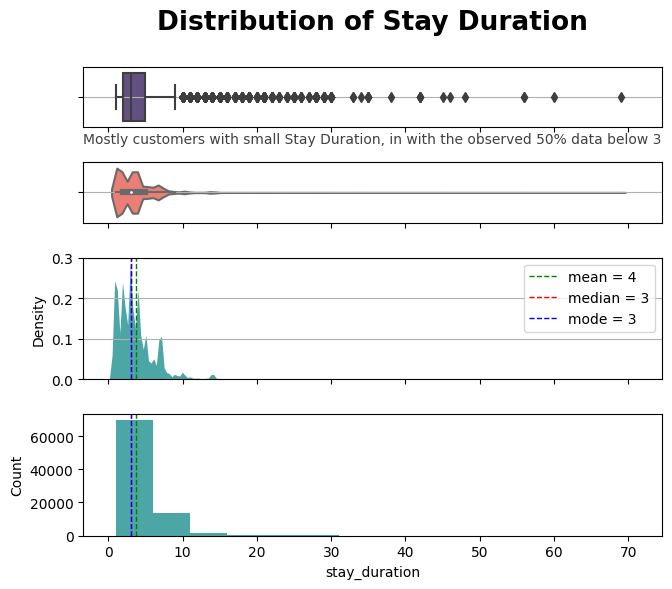

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=1,
                       figsize=(7, 6), sharex=True,
                       gridspec_kw={'height_ratios': [3, 3, 6, 6]})
total_charges = df_final['stay_duration'].dropna(axis=0)

b = sns.boxplot(x=total_charges, ax=ax[0], color='#5F4888')

v = sns.violinplot(x=total_charges, ax=ax[1], color='#FF6F61')

k = sns.kdeplot(x=total_charges, ax=ax[2], color='#008080', fill=True,
                alpha=.7, linewidth=0)

h = sns.histplot(x=total_charges, ax=ax[3], binwidth=5, color='#008080', fill=True,
                 alpha=.7, linewidth=0)

mean = round(total_charges.mean(), 3)
median = total_charges.median()
mode = total_charges.mode()[0]

measurements = [mean, median, mode]
names = ['mean', 'median', 'mode']
colors = ['green', 'red', 'blue']

for measurement, name, color in zip(measurements, names, colors):
    k.axvline(x=measurement, linestyle='--', linewidth=1, label='{} = {:,.0f}'.format(name, measurement), c=color)
    h.axvline(x=measurement, linestyle='--', linewidth=1, label='{} = {:,.0f}'.format(name, measurement), c=color)

# Adding horizontal grid lines and format tabel
for ax in [k, v, b]:
    ax.yaxis.grid(True)
    ax.set(xlabel=None)

b.set_title('Distribution of Stay Duration',
            fontsize=19, fontweight='bold', pad=27)

# Set info
x_start, x_end = b.get_xlim()
y_start, y_end = b.get_ylim()
desc = 'Mostly customers with small Stay Duration, in with the observed 50% data below 3'
b.text((x_start + x_end) / 2, y_end + 1.25, desc,
       ha='center', fontsize=10, alpha=0.75)

k.set_xlabel('Stay Duration')
k.legend()
plt.tight_layout()
plt.show()

Berdasarkan sebaran datanya, terlihat skewed positif atau skewed kanan. Untuk memudahkan pengkategorian data, maka akan diterapkan pengelompokan. Poin data yang lebih besar dari 21 akan digabungkan menjadi satu kategori.

### **2. Membuat grup dari kolom baru**

In [ ]:
def set_stayduration_group(x):
    if x['stay_duration'] <= 7:
        return '1 Week'
    elif x['stay_duration'] <= 14:
        return '2 Weeks'
    elif x['stay_duration'] <= 21:
        return '3 Weeks'
    return '4 Weeks'

df_final['stay_duration_group'] = df_final.apply(lambda x: set_stayduration_group(x), axis = 1)
df_final['stay_duration_group'].unique()

array(['1 Week', '2 Weeks', '3 Weeks', '4 Weeks'], dtype=object)

In [ ]:
df_final['stay_duration_group'].value_counts()

1 Week     80560
2 Weeks     4459
3 Weeks      234
4 Weeks      125
Name: stay_duration_group, dtype: int64

### **3. Membuat Table Agregat yang menunjukkan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap tipe hotel**

In [ ]:
df_canceled = df_final.groupby(['hotel','stay_duration_group','is_canceled']).agg({'hotel':'count'}).rename(columns={'hotel':'num_booking'}).reset_index()
df_total_cancel = df_canceled.groupby(['hotel','stay_duration_group']).agg({'num_booking':'sum'}).rename(columns={'num_booking':'total_booking'}).reset_index()

df_canceled = df_canceled.merge(df_total_cancel, on = ['hotel','stay_duration_group'])

df_canceled['ratio_cancel'] = round((df_canceled['num_booking']/df_canceled['total_booking'])*100, 2)

df_canceled

,hotel,stay_duration_group,is_canceled,num_booking,total_booking,ratio_cancel
0,City Hotel,1 Week,0,35845,51037,70.23
1,City Hotel,1 Week,1,15192,51037,29.77
2,City Hotel,2 Weeks,0,486,1009,48.17
3,City Hotel,2 Weeks,1,523,1009,51.83
4,City Hotel,3 Weeks,0,27,100,27.00
5,City Hotel,3 Weeks,1,73,100,73.00
6,City Hotel,4 Weeks,0,6,45,13.33
7,City Hotel,4 Weeks,1,39,45,86.67
8,Resort Hotel,1 Week,0,22665,29523,76.77
9,Resort Hotel,1 Week,1,6858,29523,23.23


In [ ]:
df_cancel_final = df_canceled[df_canceled['is_canceled']==1]
df_cancel_final

,hotel,stay_duration_group,is_canceled,num_booking,total_booking,ratio_cancel
1,City Hotel,1 Week,1,15192,51037,29.77
3,City Hotel,2 Weeks,1,523,1009,51.83
5,City Hotel,3 Weeks,1,73,100,73.00
7,City Hotel,4 Weeks,1,39,45,86.67
9,Resort Hotel,1 Week,1,6858,29523,23.23
11,Resort Hotel,2 Weeks,1,939,3450,27.22
13,Resort Hotel,3 Weeks,1,47,134,35.07
15,Resort Hotel,4 Weeks,1,26,80,32.50


### **4. Membuat plot yang dapat menunjukan rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel**

- x = stay_duration_group
- y = ratio_cancel

buat grafik bar/line plot perbandingan antara kedua tipe hotel

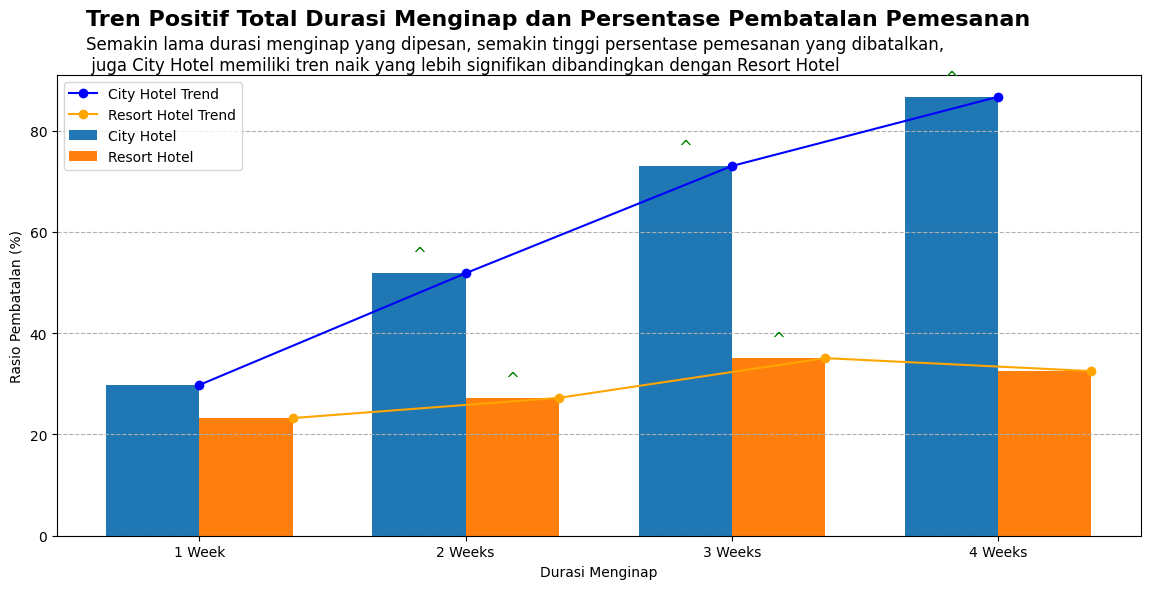

In [ ]:
plt.figure(figsize=(12, 6))

# Plotting grafik bar
city_bars = plt.bar(x, city_hotel_data['ratio_cancel'], width, label='City Hotel')
resort_bars = plt.bar([i + width for i in x], resort_hotel_data['ratio_cancel'], width, label='Resort Hotel')

# Menampilkan panah atau simbol tren menaik di atas bar
for i in range(len(city_bars)):
    if i == 0:  # Tidak ada tren untuk bar pertama
        continue
    if city_hotel_data['ratio_cancel'].iloc[i] > city_hotel_data['ratio_cancel'].iloc[i - 1]:
        plt.text(city_bars[i].get_x() + city_bars[i].get_width()/2,
                 city_hotel_data['ratio_cancel'].iloc[i] + 2, '^', ha='center', va='bottom', fontsize=12, color='green')
    if resort_hotel_data['ratio_cancel'].iloc[i] > resort_hotel_data['ratio_cancel'].iloc[i - 1]:
        plt.text(resort_bars[i].get_x() + resort_bars[i].get_width()/2,
                 resort_hotel_data['ratio_cancel'].iloc[i] + 2, '^', ha='center', va='bottom', fontsize=12, color='green')

# Menambahkan plot garis di atas grafik bar
plt.plot([i + width/2 for i in x], city_hotel_data['ratio_cancel'], marker='o', color='blue', label='City Hotel Trend')
plt.plot([i + width + width/2 for i in x], resort_hotel_data['ratio_cancel'], marker='o', color='orange', label='Resort Hotel Trend')

plt.xlabel('Durasi Menginap')
plt.ylabel('Rasio Pembatalan (%)')
plt.xticks([i + width/2 for i in x], city_hotel_data['stay_duration_group'])
plt.legend()
plt.grid(axis='y', linestyle='--')

plt.text(x=-0.25, y=102, s="Tren Positif Total Durasi Menginap dan Persentase Pembatalan Pemesanan",
         fontsize=16, fontweight='bold', ha='left', va='center') # Mengatur ha ke 'left'
plt.text(x=-0.25, y=95, s="Semakin lama durasi menginap yang dipesan, semakin tinggi persentase pemesanan yang dibatalkan, \n juga City Hotel memiliki tren naik yang lebih signifikan dibandingkan dengan Resort Hotel",
         fontsize=12, ha='left', va='center') # Mengatur ha ke 'left'

plt.tight_layout()
plt.show()


###**5. Interpretasi**

Diagram tersebut menunjukkan perbandingan rasio pembatalan pesanan untuk setiap durasi menginap (1 minggu, 2 minggu, 3 minggu, dan 4 minggu) antara dua tipe hotel, yaitu City Hotel dan Resort Hotel.

**1. City Hotel:**

- Rasio pembatalan pesanan di City Hotel cenderung tinggi untuk durasi menginap 2 minggu, 3 minggu, dan 4 minggu.
- Durasi menginap 4 minggu memiliki rasio pembatalan yang paling tinggi.
- Rasio pembatalan terendah terjadi untuk durasi menginap 1 minggu.

**2. Resort Hotel:**

- Rasio pembatalan pesanan di Resort Hotel cenderung lebih rendah dibandingkan dengan City Hotel untuk semua durasi menginap.
- Durasi menginap 4 minggu memiliki rasio pembatalan tertinggi di Resort Hotel.
- Durasi menginap 1 minggu memiliki rasio pembatalan terendah di Resort - Hotel.

**Kesimpulan:**

- Terdapat perbedaan dalam rasio pembatalan pesanan antara City Hotel dan Resort Hotel untuk semua durasi menginap yang diamati.
- City Hotel memiliki rasio pembatalan yang lebih tinggi daripada Resort Hotel untuk durasi menginap yang lebih lama (2 minggu, 3 minggu, dan 4 minggu).
- Resort Hotel cenderung memiliki rasio pembatalan yang lebih rendah untuk semua durasi menginap, dengan rasio pembatalan terendah terjadi untuk durasi menginap 1 minggu.
- Durasi menginap 1 minggu memiliki rasio pembatalan terendah di kedua jenis hotel.
- Informasi ini dapat membantu manajemen hotel untuk memahami pola pembatalan pesanan dan mengidentifikasi durasi menginap yang berisiko tinggi untuk pembatalan. Dengan demikian, mereka dapat mengambil langkah-langkah untuk mengurangi pembatalan, meningkatkan kepuasan pelanggan, dan meningkatkan efisiensi operasional.






#TUGAS 4


### **1. Buat kolom baru yang mengkategorikan waktu tunggu pemesanan**

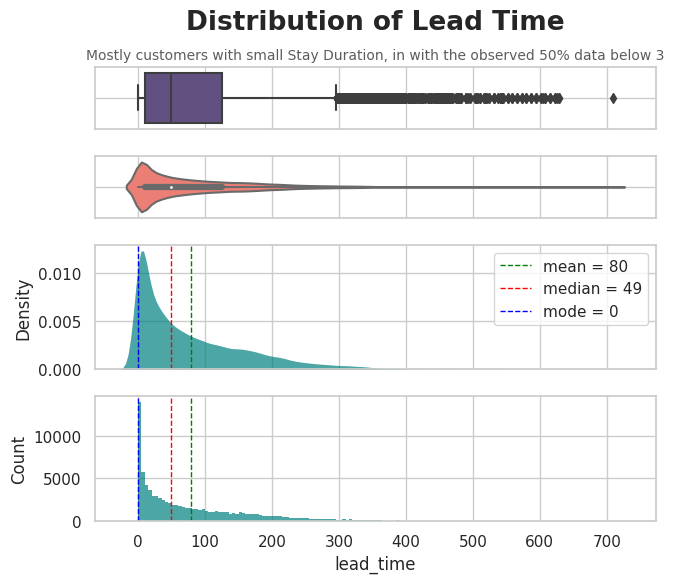

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=1,
                       figsize=(7, 6), sharex=True,
                       gridspec_kw={'height_ratios': [3, 3, 6, 6]})
total_charges = df_final['lead_time'].dropna(axis=0)

b = sns.boxplot(x=total_charges, ax=ax[0], color='#5F4888')

v = sns.violinplot(x=total_charges, ax=ax[1], color='#FF6F61')

k = sns.kdeplot(x=total_charges, ax=ax[2], color='#008080', fill=True,
                alpha=.7, linewidth=0)

h = sns.histplot(x=total_charges, ax=ax[3], binwidth=5, color='#008080', fill=True,
                 alpha=.7, linewidth=0)

mean = round(total_charges.mean(), 3)
median = total_charges.median()
mode = total_charges.mode()[0]

measurements = [mean, median, mode]
names = ['mean', 'median', 'mode']
colors = ['green', 'red', 'blue']

for measurement, name, color in zip(measurements, names, colors):
    k.axvline(x=measurement, linestyle='--', linewidth=1, label='{} = {:,.0f}'.format(name, measurement), c=color)
    h.axvline(x=measurement, linestyle='--', linewidth=1, label='{} = {:,.0f}'.format(name, measurement), c=color)

# Adding horizontal grid lines and format tabel
for ax in [k, v, b]:
    ax.yaxis.grid(True)
    ax.set(xlabel=None)

b.set_title('Distribution of Lead Time',
            fontsize=19, fontweight='bold', pad=27)

# Set info
x_start, x_end = b.get_xlim()
y_start, y_end = b.get_ylim()
desc = 'Mostly customers with small Stay Duration, in with the observed 50% data below 3'
b.text((x_start + x_end) / 2, y_end * 1.25, desc,
       ha='center', fontsize=10, alpha=0.75)

k.set_xlabel('Lead Time')
k.legend()
plt.tight_layout()
plt.show()

### **2. Buat tabel gabungan yang menampilkan perbandingan pemesanan hotel yang dibatalkan berdasarkan waktu tunggu pemesanan untuk setiap jenis hotel**

In [ ]:
def set_lead_time_group(x):
    if x['lead_time'] <= 30:
        return '1 Month'
    elif x['lead_time'] <= 120:
        return '2-4 Months'
    elif x['lead_time'] <= 210:
        return '5-7 Months'
    elif x['lead_time'] <= 300:
        return '8-10 Months'
    elif x['lead_time'] <= 360:
        return '11-12 Months'
    return '> 12 Months'

df_final['lead_time_group'] = df_final.apply(lambda x: set_lead_time_group(x),axis=1)
df_final['lead_time_group'].unique()

array(['1 Month', '2-4 Months', '5-7 Months', '> 12 Months',
       '11-12 Months', '8-10 Months'], dtype=object)

In [ ]:
df_final['lead_time_group'].value_counts()

1 Month         33810
2-4 Months      29379
5-7 Months      14484
8-10 Months      5532
11-12 Months     1558
> 12 Months       615
Name: lead_time_group, dtype: int64

### **3. Membuat Table Agregat yang menunjukkan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap lead time untuk setiap tipe hotel**

In [ ]:
df_cancel = df_final.groupby(['hotel','lead_time_group','is_canceled']).agg({'hotel':'count'}).rename(columns={'hotel':'num_booking'}).reset_index()
df_total_cancel = df_cancel.groupby(['hotel','lead_time_group']).agg({'num_booking':'sum'}).rename(columns={'num_booking':'total_booking'}).reset_index()

df_cancel = df_cancel.merge(df_total_cancel, on = ['hotel','lead_time_group'])

df_cancel['ratio_cancel'] = round((df_cancel['num_booking']/df_cancel['total_booking'])*100, 2)

df_cancel

,hotel,lead_time_group,is_canceled,num_booking,total_booking,ratio_cancel
0,City Hotel,1 Month,0,16024,19951,80.32
1,City Hotel,1 Month,1,3927,19951,19.68
2,City Hotel,11-12 Months,0,287,704,40.77
3,City Hotel,11-12 Months,1,417,704,59.23
4,City Hotel,2-4 Months,0,12918,19574,66.00
5,City Hotel,2-4 Months,1,6656,19574,34.00
6,City Hotel,5-7 Months,0,5402,8721,61.94
7,City Hotel,5-7 Months,1,3319,8721,38.06
8,City Hotel,8-10 Months,0,1561,2870,54.39
9,City Hotel,8-10 Months,1,1309,2870,45.61


In [ ]:
df_cancel_final = df_cancel[df_cancel['is_canceled']==1]
df_cancel_final

,hotel,lead_time_group,is_canceled,num_booking,total_booking,ratio_cancel
1,City Hotel,1 Month,1,3927,19951,19.68
3,City Hotel,11-12 Months,1,417,704,59.23
5,City Hotel,2-4 Months,1,6656,19574,34.00
7,City Hotel,5-7 Months,1,3319,8721,38.06
9,City Hotel,8-10 Months,1,1309,2870,45.61
11,City Hotel,> 12 Months,1,199,371,53.64
13,Resort Hotel,1 Month,1,1690,13859,12.19
15,Resort Hotel,11-12 Months,1,370,854,43.33
17,Resort Hotel,2-4 Months,1,3018,9805,30.78
19,Resort Hotel,5-7 Months,1,1851,5763,32.12


### **4. Membuat plot yang dapat menunjukan rasio pembatalan pesanan terhadap lead time untuk setiap tipe hotel**

- x = lead_time_group
- y = ratio_cancel

buat grafik bar/line plot perbandingan antara kedua tipe hotel

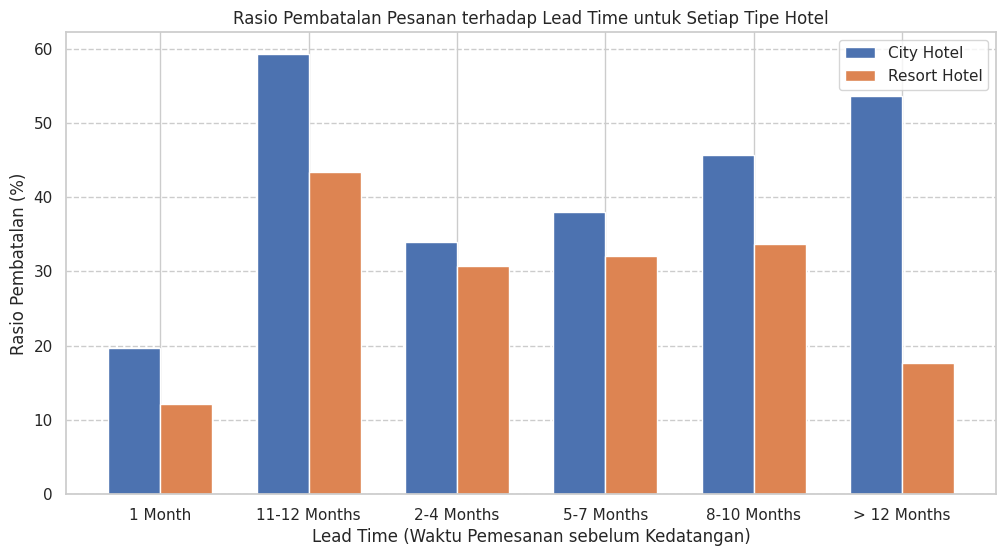

In [ ]:
# Filter data untuk masing-masing tipe hotel
city_hotel_data = df_cancel_final[df_cancel_final['hotel'] == 'City Hotel']
resort_hotel_data = df_cancel_final[df_cancel_final['hotel'] == 'Resort Hotel']
# Plotting grafik bar
width = 0.35  # lebar bar
x = range(len(city_hotel_data))

plt.figure(figsize=(12, 6))
plt.bar(x, city_hotel_data['ratio_cancel'], width, label='City Hotel')
plt.bar([i + width for i in x], resort_hotel_data['ratio_cancel'], width, label='Resort Hotel')

plt.xlabel('Lead Time (Waktu Pemesanan sebelum Kedatangan)')
plt.ylabel('Rasio Pembatalan (%)')
plt.title('Rasio Pembatalan Pesanan terhadap Lead Time untuk Setiap Tipe Hotel')
plt.xticks([i + width/2 for i in x], city_hotel_data['lead_time_group'])
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

##**5. Interpretasi:**

Diagram tersebut menunjukkan perbandingan rasio pembatalan pesanan terhadap lead time (waktu pemesanan sebelum kedatangan) untuk kedua tipe hotel, yaitu City Hotel dan Resort Hotel.

**1. City Hotel:**

- Rasio pembatalan pesanan di City Hotel cenderung tinggi untuk lead time yang sangat lama, yaitu untuk pemesanan yang dilakukan 11-12 bulan sebelum kedatangan dan lebih dari 12 bulan sebelum kedatangan.
- Pemesanan dengan lead time 11-12 bulan memiliki rasio pembatalan tertinggi.
- Rasio pembatalan cenderung menurun untuk lead time yang lebih pendek, namun tetap relatif tinggi untuk lead time 5-7 bulan, dan 8-10 bulan.
- Pemesanan dengan lead time 1 bulan memiliki rasio pembatalan terendah.

**2. Resort Hotel:**

- Rasio pembatalan pesanan di Resort Hotel cenderung lebih rendah dibandingkan dengan City Hotel untuk semua grup lead time.
- Resort Hotel memiliki rasio pembatalan yang paling rendah untuk lead time 1 bulan.
- Resort Hotel juga menunjukkan rasio pembatalan yang relatif rendah untuk lead time 2-4 bulan, 5-7 bulan, dan 8-10 bulan.
- Pemesanan dengan lead time 11-12 bulan memiliki rasio pembatalan tertinggi di Resort Hotel.

**Kesimpulan:**

- Diagram tersebut menggambarkan bahwa City Hotel memiliki rasio pembatalan yang lebih tinggi dibandingkan dengan Resort Hotel untuk semua grup lead time.
- Resort Hotel cenderung memiliki rasio pembatalan yang lebih rendah, terutama untuk pemesanan dengan lead time yang lebih pendek.
- Pemesanan dengan lead time yang sangat lama, yaitu 11-12 bulan dan lebih dari 12 bulan, memiliki risiko pembatalan yang tinggi, terutama di City Hotel.
- Informasi ini dapat membantu manajemen hotel dalam merencanakan strategi pemasaran dan kebijakan pembatalan yang lebih efektif. Dengan memahami pola pembatalan berdasarkan lead time, hotel dapat mengambil langkah-langkah untuk mengurangi tingkat pembatalan dan meningkatkan tingkat konversi pemesanan, sehingga meningkatkan efisiensi operasional dan kepuasan pelanggan.